In [1]:
# created: 2/22/23
# author: etmu9498

# summary: using new scripts saved under "code/scripts-winter2023/crl-data-processing", process 2022 crl data in a simpler,
# less metadata intensive way! 
# look in the "readme.txt" file in the same folder for additional ideeas / proper usage
# methods build off of code steps in "Processing New Data Steps.ipynb", but they save data in new locations, aim to improve
# the code's runtime speed and storage usage, and be more modular, so that not all steps have to be followed to look at 
# just the processed crl data!
# save new datasets under "data/crl-all-data-processed"

# 2/23/23 addition
# under the folder "code/scripts-winter2023/fl-data-processing", I've also been working on scripts to process flight 
# level data! This script trims down the input fields while adding new fields like radial distance and rmw.
# save new datasets under "data/in-situ-noaa-processed"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray

os.chdir( "/Users/etmu9498/research/code/scripts")
import helper_fns
os.chdir( "/Users/etmu9498/research/code/scripts-winter2023/crl-data-processing")
import save_crl_data
import simple_crl_plots
os.chdir( "/Users/etmu9498/research/code/scripts-winter2023/fl-data-processing")
import save_fl_data

In [3]:
# for comparison, look at the old datasets
# os.chdir( "/Users/etmu9498/research/data/CRL_data/2021")
os.chdir( "/Users/etmu9498/research/data/CRL_data/2021")

data = xarray.open_dataset( 'P3_20210927H1_213003-253558.cdf') 

print( len( data.time.values) * len( data.H.values) )
print( np.shape( data.T))
print( type( data.T))
print( type( data.T[0, 0].values))
print( data.T[0, 0].values)

print( data.H)

print( data.P_ch1[1000, :].values)
print( 10 * np.log10( data.P_ch1[1000, :]).values)

data

4349268
(7322, 594)
<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>
999.0
<xarray.DataArray 'H' (layers: 594)>
array([-3.5887, -3.5827, -3.5767, ..., -0.0427, -0.0367, -0.0307],
      dtype=float32)
Dimensions without coordinates: layers
Attributes:
    long_name:  Height below aircraft
    units:      km
[-2.00478196e-01 -2.00478196e-01 -2.00478196e-01 -2.00478196e-01
 -2.00478196e-01 -2.00478196e-01 -2.00478196e-01 -2.00478196e-01
  1.24169979e-03  1.43824844e-03  1.64923177e-03  1.87464943e-03
  2.11450132e-03  2.36878800e-03  2.63750902e-03  2.92066438e-03
  3.21825454e-03  3.52950254e-03  3.85584193e-03  4.19443939e-03
  4.54634149e-03  4.89868410e-03  5.27880201e-03  5.65378182e-03
  6.05231524e-03  6.44095708e-03  6.83281804e-03  7.19035976e-03
  7.56324967e-03  7.84072652e-03  8.15375894e-03  8.49270727e-03
  8.70805793e-03  8.84457678e-03  8.99413228e-03  9.25809052e-03
  9.47277434e-03  9.49320197e-03  9.62939858e-03  9.64653771e-03
  9.77362320e-03  9.84537

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


<xarray.Dataset>
Dimensions:             (Time: 7322, layers: 594)
Dimensions without coordinates: Time, layers
Data variables:
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    Lon                 (Time) float32 ...
    Lat                 (Time) float32 ...
    H                   (layers) float32 -3.589 -3.583 ... -0.0367 -0.0307
    time                (Time) float32 21.5 21.5 21.5 21.5 ... 25.6 25.6 25.6
    LSR                 (Time, layers) float32 ...
    WVMR                (Time, layers) float32 ...
    T                   (Time, layers) float32 ...
    P_ch1               (Time, layers) float32 ...
Attributes:
    global_att:    This file is generated with our Compact Raman lidar measur...
    global_att1:   The data for each flight is mapped to the same height bin ...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu

In [4]:
# see how the new datasets look!
os.chdir( "/Users/etmu9498/research/data/crl-all-data-processed/2021")
data = xarray.open_dataset( 'P3_20210927H1_processed.nc') 

'''
print( np.shape( data.T))
print( type( data.T))
print( type( data.T[0, 0].values))
print( data.T[0, 0].values)
print( len( data.time.values) * len( data.height.values) )

print( type( data.Lon))
print( type( data.Lon[5000].values))

print( type( data.rmw))
print( type( data.rmw[5000].values))

i = 5000
print( data.time[i])
print( np.nanmax( data.P_ch1[i, :]))
print( np.nanmin( data.P_ch1[i, :]))

print( data.P_ch1[i, :].values)
'''

data

<xarray.Dataset>
Dimensions:             (time: 7322, height: 667)
Coordinates:
  * time                (time) float32 21.5 21.5 21.5 21.5 ... 25.6 25.6 25.6
  * height              (height) float64 4e+03 3.994e+03 3.988e+03 ... 10.0 4.0
Data variables: (12/15)
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    Lon                 (time) float32 ...
    Lat                 (time) float32 ...
    T                   (time, height) float64 ...
    P_ch1               (time, height) float64 ...
    ...                  ...
    center_dist         (time) float64 ...
    rmw                 (time) float64 ...
    wind_speed          (time) float64 ...
    w                   (time) float64 ...
    fl_wv               (time) float64 ...
    fl_T                (time) float64 ...
Attributes:
    global_att1:   This file is generated with our Compact Raman lidar measur...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu
    global_att4:  This Dataset is based off the dataset P3_20210927H1_213003-...

In [3]:
# Look at flight level datasets too!
os.chdir( "/Users/etmu9498/research/data/in-situ-noaa-processed/2021")
data = xarray.open_dataset( '20210927I1_sam_processed.nc', decode_times=False) 
data

<xarray.Dataset>
Dimensions:         (time: 27035)
Coordinates:
  * time            (time) float64 10.54 10.55 10.55 10.55 ... 18.05 18.05 18.05
Data variables:
    HT.d            (time) float32 ...
    THETA.d         (time) float32 ...
    THETAV.d        (time) float32 ...
    WS.d            (time) float32 ...
    UWZ.d           (time) float32 ...
    SfmrRainRate.1  (time) float32 ...
    THETAE.d        (time) float32 ...
    MR.d            (time) float32 ...
    TA.d            (time) float32 ...
    PSURF.d         (time) float32 ...
    LATref          (time) float32 ...
    LONref          (time) float32 ...
Attributes:
    Author:       Created by NOAA HRD. Link to data: https://www.aoml.noaa.go...
    Editor:       Edited by: Ethan Murray (etmu9498@colorado.edu)
    Attribution:  This Dataset is based off the dataset 20210927I1_sam.nc. Pl...

In [3]:
# save new crl datasets!

# inputdict['2021'] = ['P3_20210827H1_203112-275220.cdf', 'P3_20210828H1_200115-221321.cdf']
#inputdict['2022'] = ['P3_20220830H1_093003-124534.cdf', 'P3_20220905H1_090600-132602.cdf']

inputdict = {}
inputdict['2021'] = ['P3_20210927H1_213003-253558.cdf', 'P3_20210929H2_211201-261159.cdf']

# save_crl_data.save_tcs( tc='2021', add_dist_coords={'new_heights': True, 'fl_fields': False, 'rmw': True})


Number of data files to be plotted: 2
New CRL File Plotted and Saved: 2021/P3_20210927H1_processed.nc
New CRL File Plotted and Saved: 2021/P3_20210929H2_processed.nc


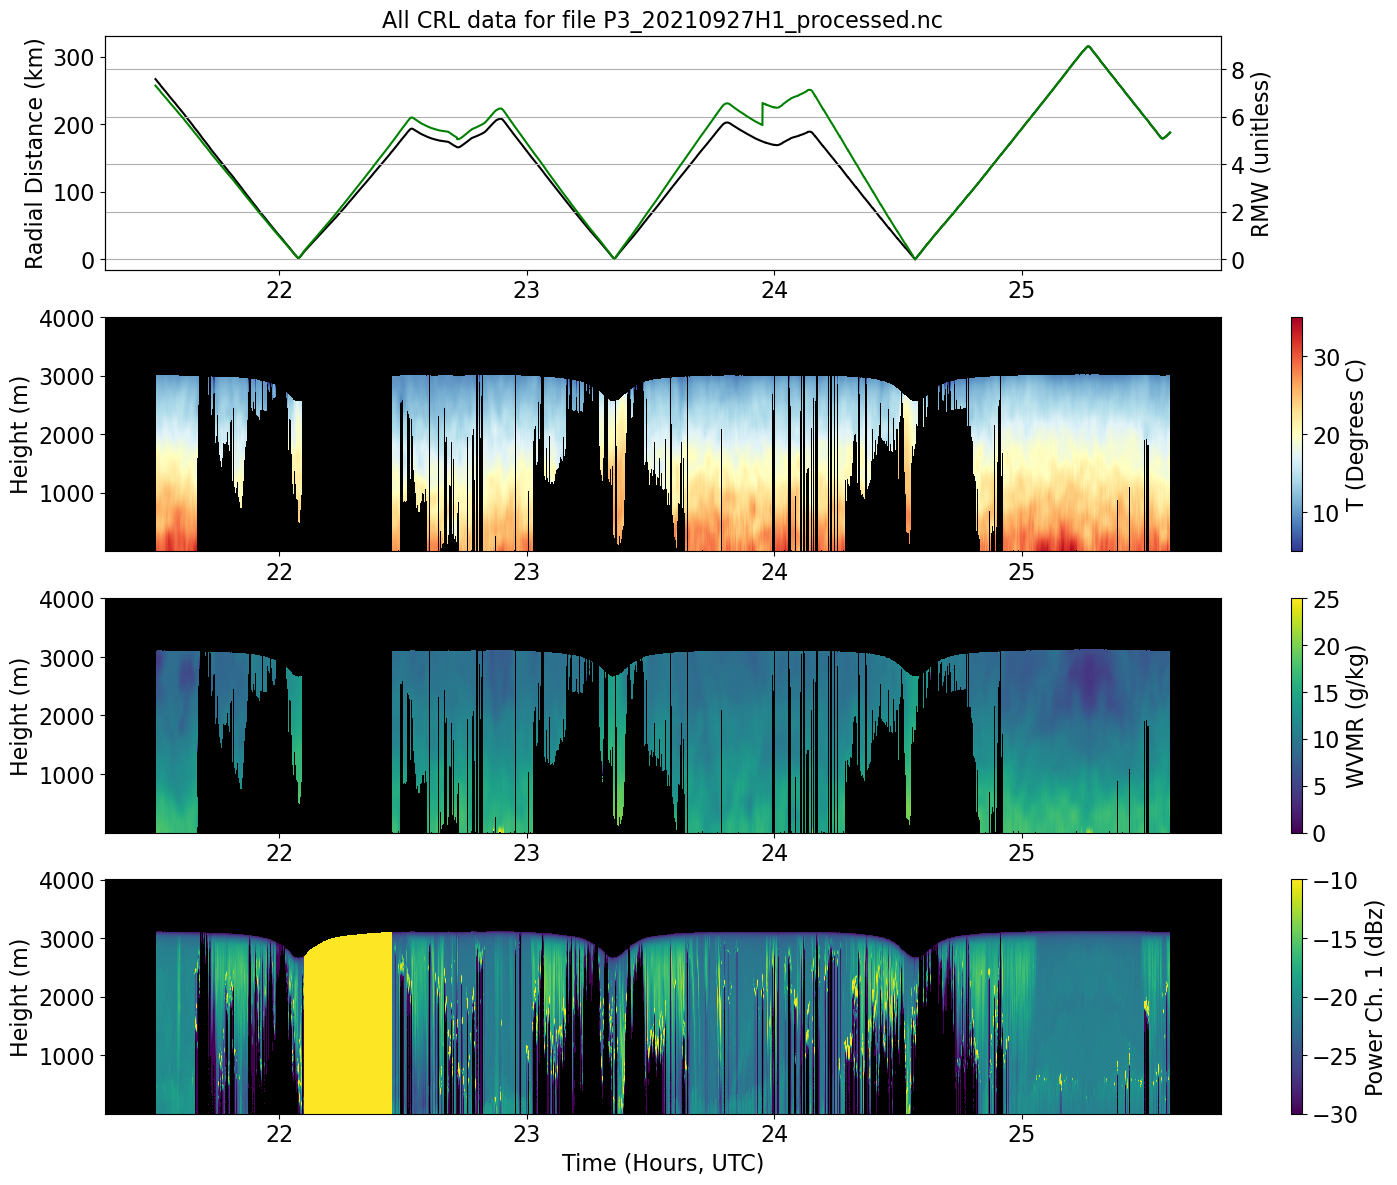

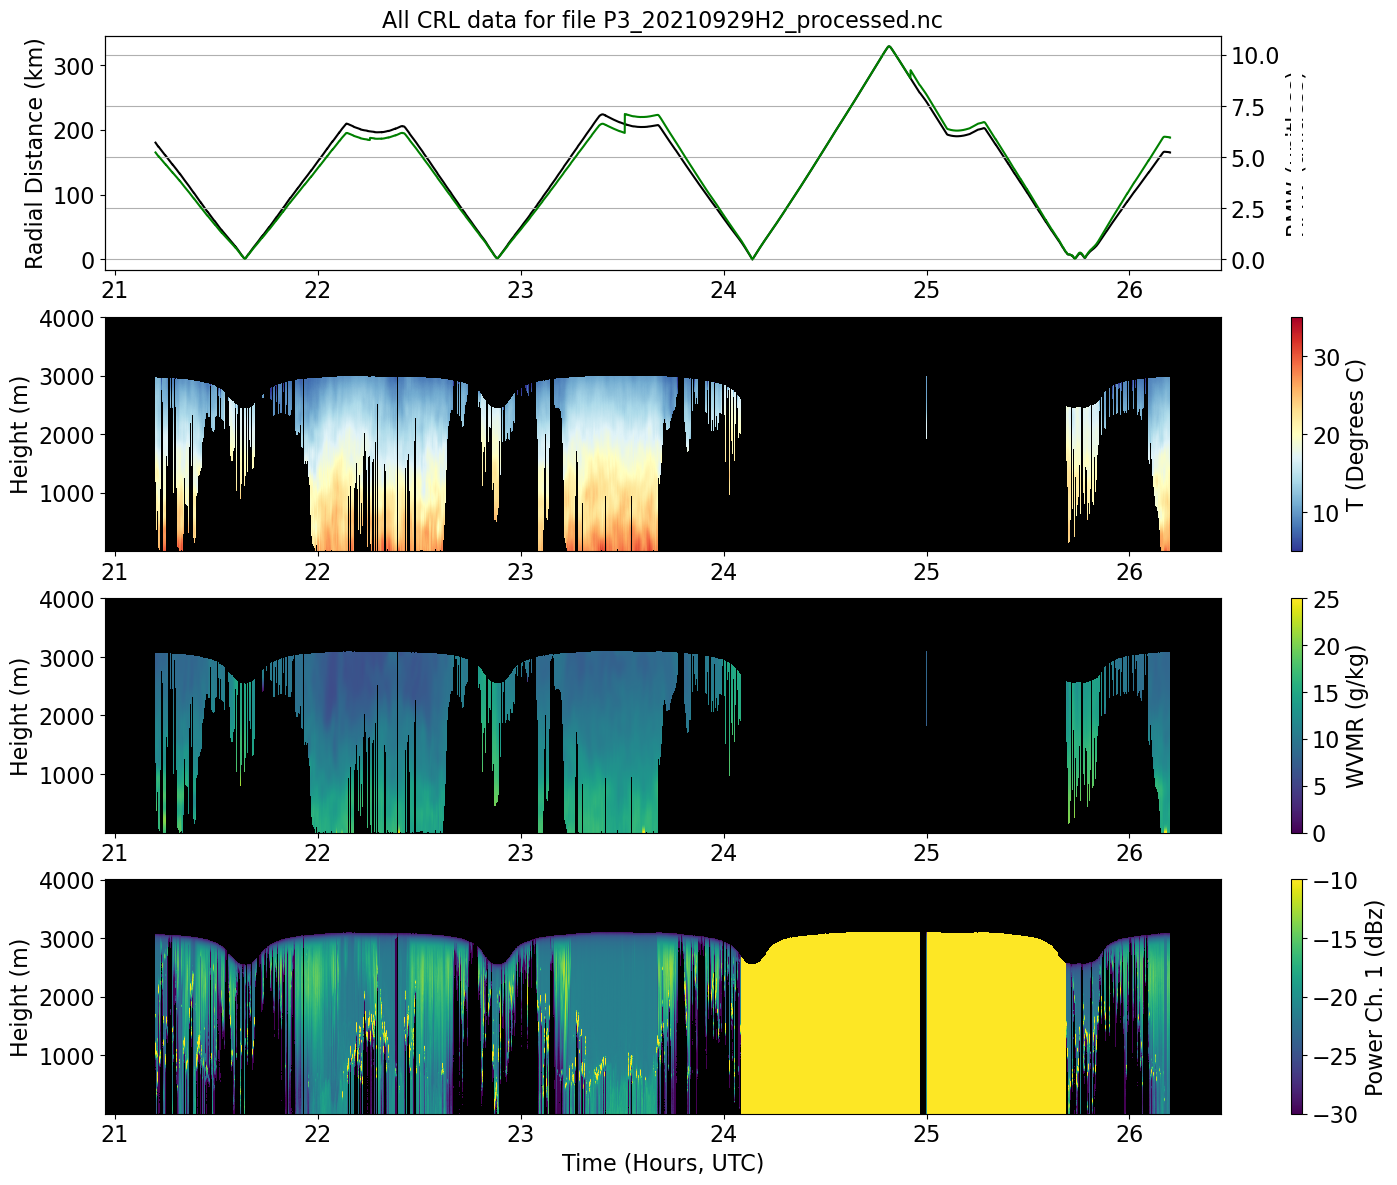

In [2]:
# automatically make nicer plots of the data!
inputdict = {}
inputdict['2021'] = ['P3_20210927H1_processed.nc', 'P3_20210929H2_processed.nc']
simple_crl_plots.plot_all( tc=inputdict )

In [10]:
print( np.shape( data.T)[0])

np.set_printoptions(threshold=np.inf)

# print( data.H.values)
# print( data.T.values[ 10, :])

np.set_printoptions(threshold=1000)


9300


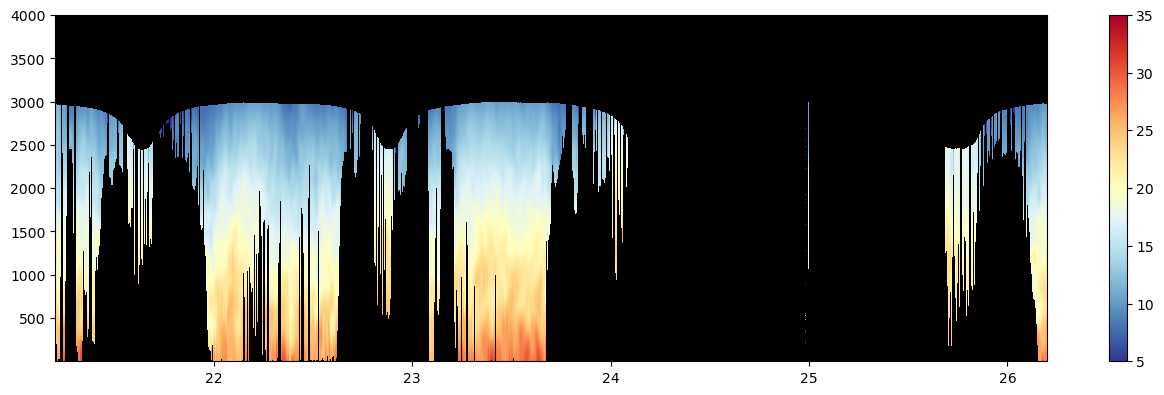

In [16]:
# quick plotting test #2

# calculate power backscattered to channel 1
plt.figure( figsize=(16, 4.5))

min = 5
max = 35 # -30
map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.pcolormesh( data.time, data.H, data.T.transpose(), vmin = min, vmax = max, cmap = map)
plt.colorbar()
ax = plt.gca()
ax.set_facecolor('k')


In [3]:
# save new flight level datasets!
inputdict = {}
# inputdict['2021'] = [ '20210925H1_sam.nc', '20210927I1_sam.nc']
# inputdict['2019'] = [ '20190712H2_barry.nc']
# inputdict['2022'] = ["20221007H1_julia.nc", "20221008H1_julia.nc", "20221009H1_julia.nc"]

inputdict['2022'] = ['20221110I1_nicole.nc']

# load certain x axes!
inputdict2={'center_dist': True, 'psurf_dist': False, 'rmw': True, 'vars_to_save': 'default'}
# inputdict2={'center_dist': False, 'psurf_dist': False, 'rmw': False, 'vars_to_save': 'default'}

# maybe make the vars_to_save variables additional to the ones always included?
save_fl_data.save_tcs( tc='2021', add_dist_coords=inputdict2)

Number of data files to be processed: 47
No track file for TC 20210630I1_misc.nc present. Nans saved in dist and rmw axis.
New In Situ File Created and Saved: 20210630I1_misc_processed.nc

No track file for TC 20210701H1_elsa.nc present. Nans saved in dist and rmw axis.
New In Situ File Created and Saved: 20210701H1_elsa_processed.nc

No track file for TC 20210702H1_elsa.nc present. Nans saved in dist and rmw axis.
New In Situ File Created and Saved: 20210702H1_elsa_processed.nc

No track file for TC 20210702I1_misc.nc present. Nans saved in dist and rmw axis.
New In Situ File Created and Saved: 20210702I1_misc_processed.nc

No track file for TC 20210703H1_elsa.nc present. Nans saved in dist and rmw axis.
New In Situ File Created and Saved: 20210703H1_elsa_processed.nc

No track file for TC 20210704H1_elsa.nc present. Nans saved in dist and rmw axis.
New In Situ File Created and Saved: 20210704H1_elsa_processed.nc

No track file for TC 20210705H1_elsa.nc present. Nans saved in dist and

number of flight level data points: 36372
index = 0
index = 10000
index = 20000
index = 30000
number of lat nans: 5891
number of lon nans: 5891
Error in first if statement! there should alway be valid eyewalls
rainband index = 14767
rainband index = 14767
rainband index = 18596
rainband index = 18596
New In Situ File Created and Saved: 20210926H1_sam_processed.nc

number of flight level data points: 16471
index = 0
index = 10000
number of lat nans: 4350
number of lon nans: 4350
No wind speed peaks found for this case, so all RMW values will be nans.
New In Situ File Created and Saved: 20210926I1_sam_processed.nc

number of flight level data points: 33766
index = 0
index = 10000
index = 20000
index = 30000
number of lat nans: 5445
number of lon nans: 5445
rainband index = 16398
rainband index = 16398
rainband index = 20871
rainband index = 20871
New In Situ File Created and Saved: 20210927H1_sam_processed.nc

number of flight level data points: 27035
index = 0
index = 10000
index = 2000

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


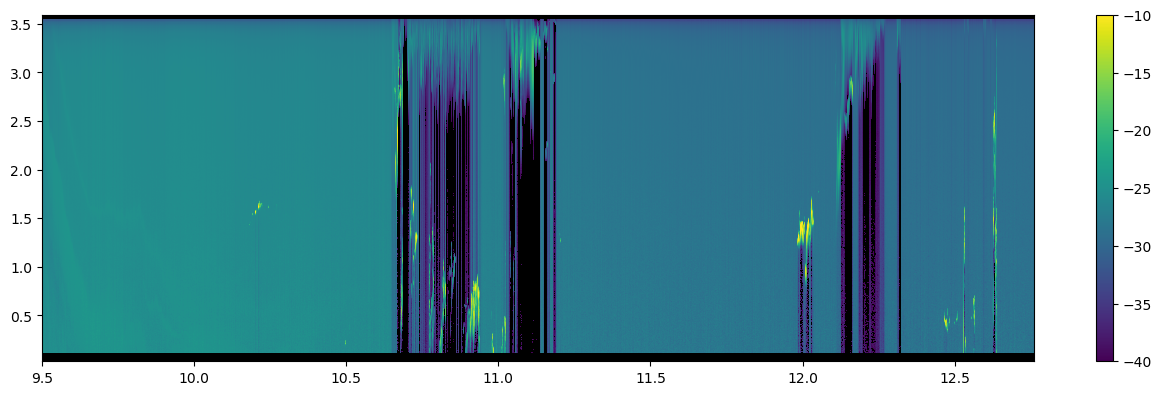

In [20]:
# a quick plotting test

# calculate power backscattered to channel 1
plt.figure( figsize=(16, 4.5))
cutoff = -40
step1 = 10 * np.log10( data.P_ch1 )
step2 = step1.where( step1.values > cutoff)

plt.pcolormesh( data.time, - data.H, step2.transpose(), vmin = cutoff, vmax =-10)
plt.colorbar()
ax = plt.gca()
ax.set_facecolor('k')
